<a href="https://colab.research.google.com/github/gksdydcks/Ai/blob/main/05_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 05.다중 선형회귀 실습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch: 100/1000, Loss: 2.3357
Epoch: 200/1000, Loss: 2.0818
Epoch: 300/1000, Loss: 2.0779
Epoch: 400/1000, Loss: 2.0760
Epoch: 500/1000, Loss: 2.0742
Epoch: 600/1000, Loss: 2.0724
Epoch: 700/1000, Loss: 2.0706
Epoch: 800/1000, Loss: 2.0688
Epoch: 900/1000, Loss: 2.0671
Epoch: 1000/1000, Loss: 2.0653


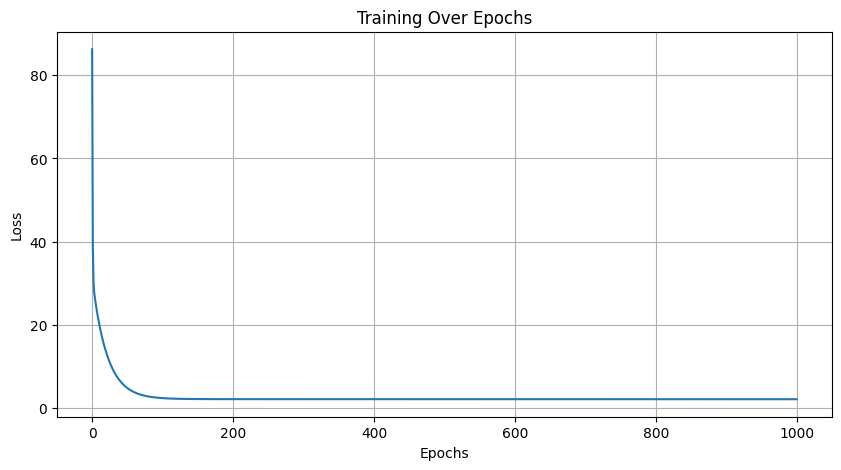

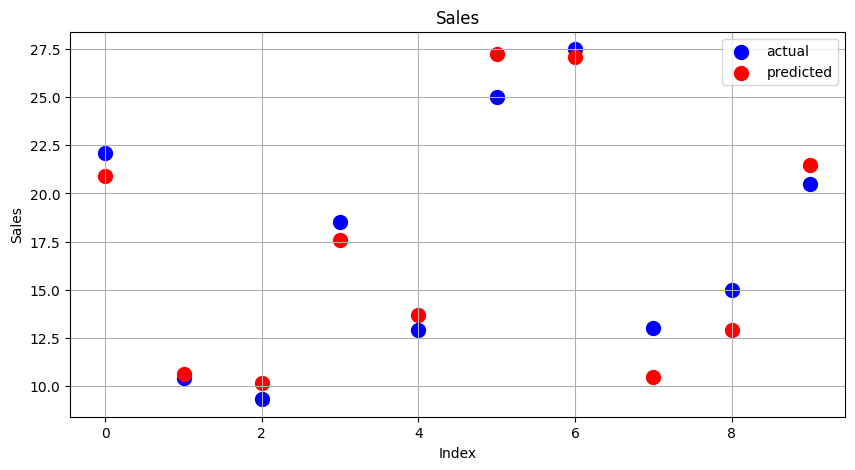

In [ ]:
###데이터 입출력
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9],
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

###모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

###손실함수 정의
loss_function = nn.MSELoss()
###가중치 업데이트
optimizer = optim.SGD(model.parameters(),lr = 0.0001)
epochs = 1000
losses = []

###학습반복
for epoch in range(epochs):
  optimizer.zero_grad()#기울기 초기화
  outputs = model(x)
  loss = loss_function(outputs,y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  if (epoch+1) % 100 == 0:
    print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

###결과 시각화
plt.figure(figsize=(10,5))

#손실감소 그래프

plt.plot(losses)
plt.title("Training Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

#  데이터와 예측결과 시각화
plt.figure(figsize=(10,5))
predicted = model(x).detach().numpy()
actual = y.numpy()

plt.scatter(range(len(actual)),actual,label ="actual",color = "b",s=100)
plt.scatter(range(len(predicted)),predicted,label ="predicted",color = "r",s=100)
plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Sales")
plt.grid()
plt.legend()
plt.show()



### 실습2. 로지스틱 회귀 구현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

[[ 1.49671415e+00  8.61735699e-01]
 [ 1.64768854e+00  2.52302986e+00]
 [ 7.65846625e-01  7.65863043e-01]
 [ 2.57921282e+00  1.76743473e+00]
 [ 5.30525614e-01  1.54256004e+00]
 [ 5.36582307e-01  5.34270246e-01]
 [ 1.24196227e+00 -9.13280245e-01]
 [-7.24917833e-01  4.37712471e-01]
 [-1.28311203e-02  1.31424733e+00]
 [ 9.19759245e-02 -4.12303701e-01]
 [ 2.46564877e+00  7.74223700e-01]
 [ 1.06752820e+00 -4.24748186e-01]
 [ 4.55617275e-01  1.11092259e+00]
 [-1.50993577e-01  1.37569802e+00]
 [ 3.99361310e-01  7.08306250e-01]
 [ 3.98293388e-01  2.85227818e+00]
 [ 9.86502775e-01 -5.77109290e-02]
 [ 1.82254491e+00 -2.20843650e-01]
 [ 1.20886360e+00 -9.59670124e-01]
 [-3.28186049e-01  1.19686124e+00]
 [ 1.73846658e+00  1.17136828e+00]
 [ 8.84351718e-01  6.98896304e-01]
 [-4.78521990e-01  2.80155792e-01]
 [ 5.39361229e-01  2.05712223e+00]
 [ 1.34361829e+00 -7.63040155e-01]
 [ 1.32408397e+00  6.14917720e-01]
 [ 3.23078000e-01  1.61167629e+00]
 [ 2.03099952e+00  1.93128012e+00]
 [ 1.60782477e-01  6

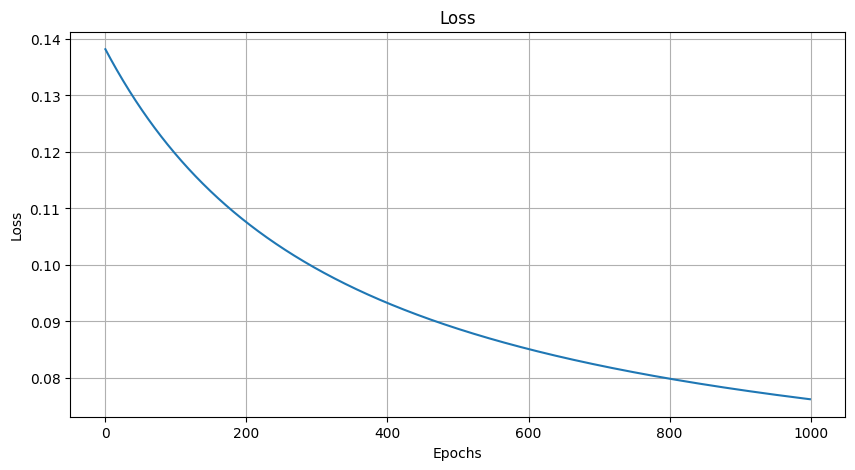

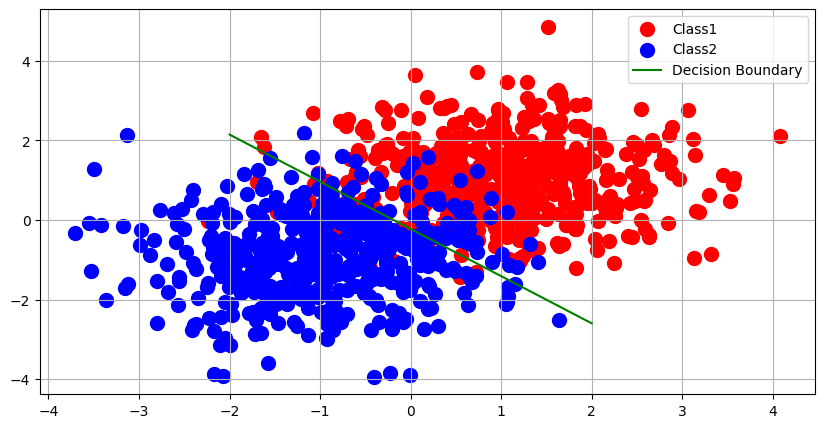

In [ ]:
####1. 입출력 정의
np.random.seed(42)
num_samples = 500

###1-1.
mean_1 = np.array([1.0,1.0])
cov_1 = np.array([[1,0],
                   [0,1]])  #x의 퍼짐정도 y의 퍼짐정도
data_1 = np.random.multivariate_normal(mean_1,cov_1,num_samples)
print(data_1)

###1-2.
mean_2 = np.array([-1.0,-1.0])
cov_2 = np.array([[1,0],
                   [0,1]])  #x의 퍼짐정도 y의 퍼짐정도
data_2 = np.random.multivariate_normal(mean_2,cov_2,num_samples)

data = np.vstack((data_1,data_2))  #데이터 합치기
data = torch.from_numpy(data).float()
labels = np.ones(num_samples*2) #1000개 생성
labels[num_samples:] = 0
labels =torch.from_numpy(labels).float().view(-1,1)
labels

####2.모델 정의
class LogisticRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out
model = LogisticRegression(2,1)#모델생성

#### 3. 손실함수 정의
loss_fn =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)
epochs = 1000
losses = []

#### 4.학습
for epoch in range(epochs):
  optimizer.zero_grad()#기울기 초기화
  outputs = model(data)
  loss = loss_function(outputs,labels)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  if (epoch+1) % 100 == 0:
    print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

###5.결과 시각화
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

#  데이터와 예측결과 시각화
plt.figure(figsize=(10,5))
w= model.linear.weight.detach().numpy()
b= model.linear.bias.detach().numpy()

x1 = np.array([-2,2])
x2 =(-(w[0][0]*x1)-b[0])/w[0][1]
#0=w1*x1+w2*x2+b
#-(w1*x1) = w2*x2 +b
#-(w1*x1)-b=w2*x2
#(-(w1*x1)-b) w2=x2 =코드로 나타내야함

plt.scatter(data_1[:,0],data_1[:,1],label ="Class1",color = "r",s=100)
plt.scatter(data_2[:,0],data_2[:,1],label ="Class2",color = "b",s=100)
plt.plot(x1,x2,label ="Decision Boundary",color = "g")

plt.grid()
plt.legend()
plt.show()

### 실습3. FashionMNIST 신경망 구현
- 이미지 학습 > 클래스 분류

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)



cuda


In [6]:

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512),
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256),
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

Epoch: 1----------------------


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
plot_img = input_img.squeeze().cpu().numpy()

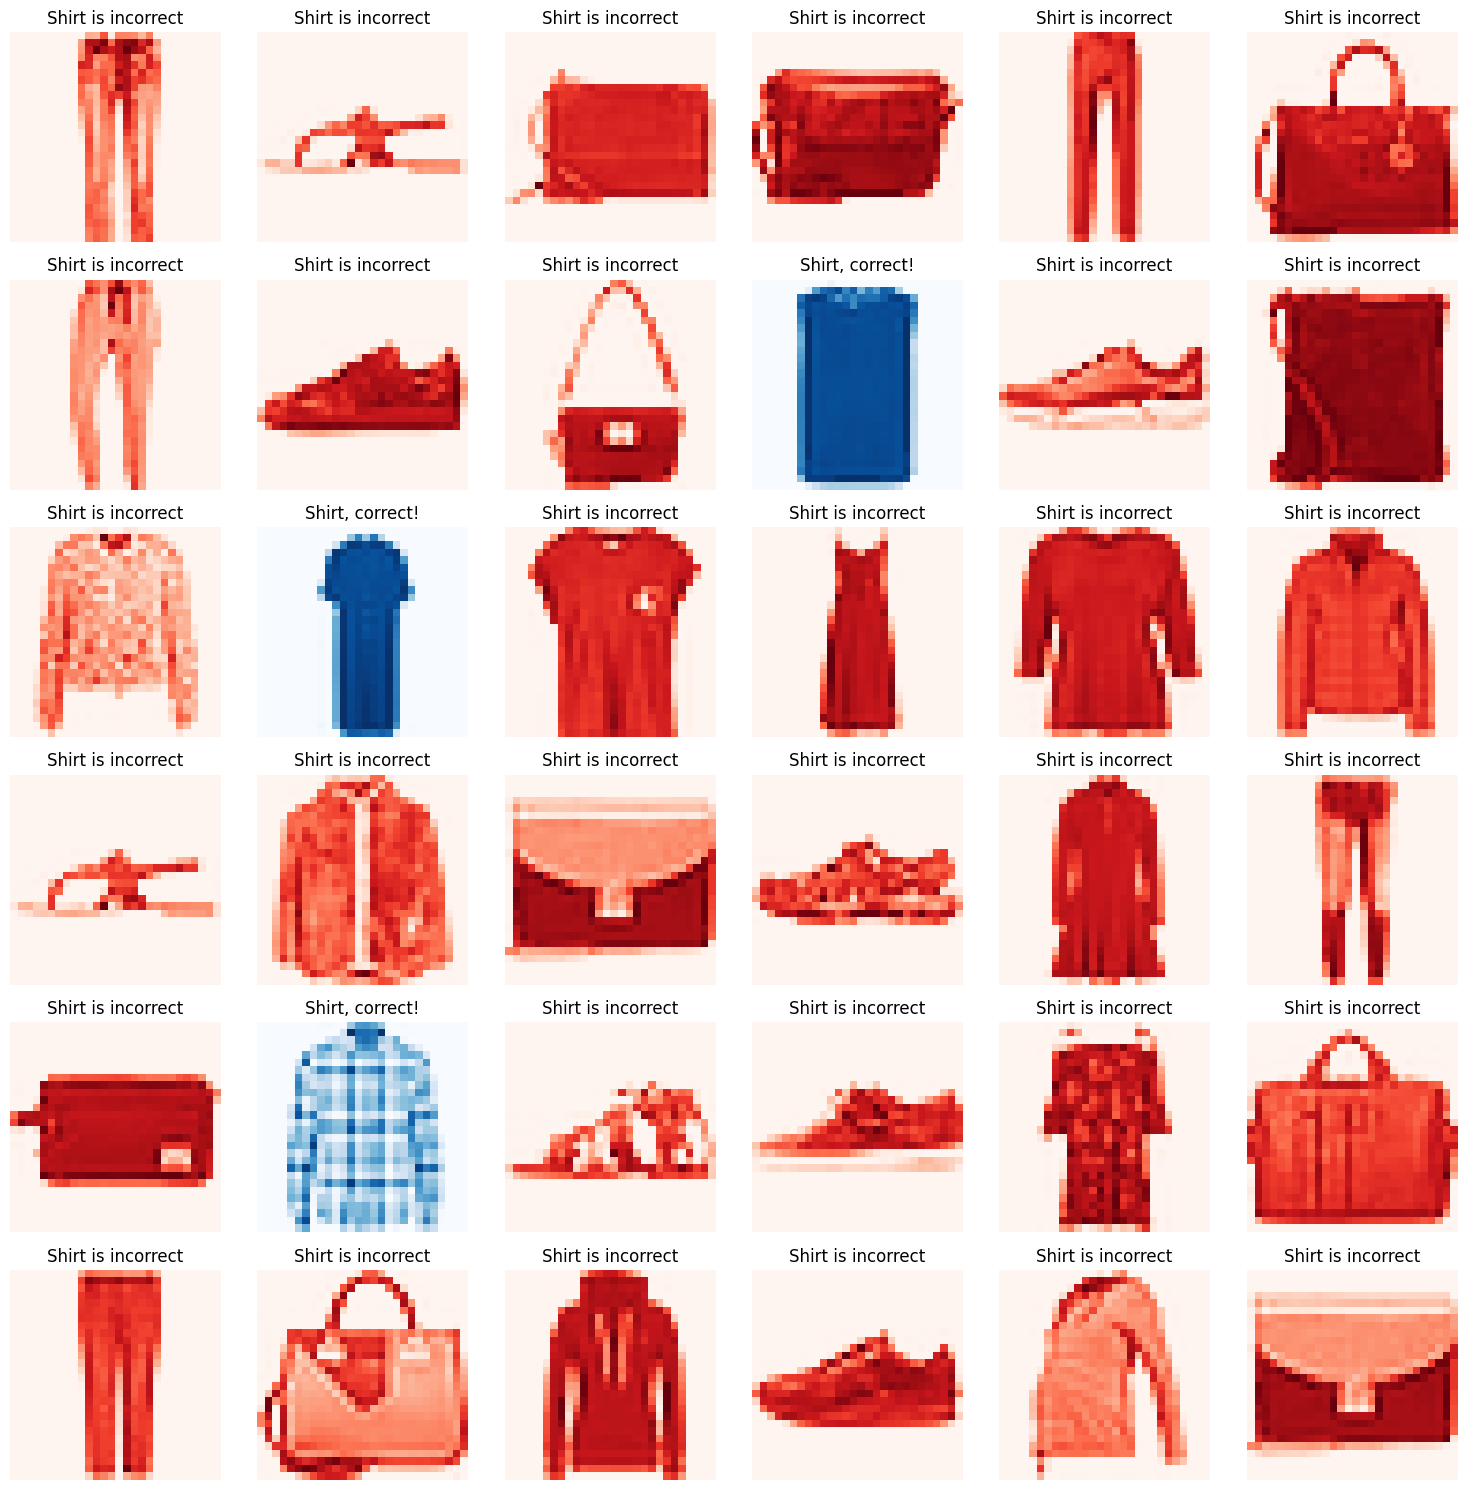

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis("off")

plt.tight_layout()
plt.show()

### 실습4. CNN 구현

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [24]:

###1. 데이터 입출력
# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(), # 데이터 증강 : 이미지를 좌우 반전
                                transforms.RandomCrop(32, padding=4),   # 32*32 이미지 크기에 패딩을 4 적용> 40*40으로 바뀜 #랜덤으로 32자름
                                transforms.ToTensor(), # 텐서로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #정규화 (r,g,b 평균),(r,g,b 표준편차)


# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

###2. 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        #conv2번/pooling 2번  #pooling : 이미지 한개를 놓고 필터 여러개를 쓰면 레이어가 많아짐>데이터 커짐>이미지 하나당 사이즈를 줄임
        #activation relu
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 6, 5), #32*32 > 28*28*6
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # stride > 28*28 > 14*14
            nn.Conv2d(6, 16, 5), # 14*14 > 10*10*16
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 10*10 > 5*5
        )
        self.flatten = nn.Flatten  # 2차원 데이터 1차원으로 평탄화
        self.fc_layer = nn.Sequential(
            nn.Linear(5*5*16, 120), #위에서 받은 데이터 5*5,필터 16개> 120 개로 줄임
            nn.ReLU(),
            nn.Linear(120, 84),   #120>84 줄임
            nn.ReLU(),
            nn.Linear(84, 10)   # 10개의 출력
        )
    def foward(self, x):
        out = self.conv_layers(x)
        flatten = self.flatten(out)
        fc_out = self.fc_layer(flatten)
        return fc_out

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN().to(device)

###3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()

###4. 기울기 학습
optimaizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9)
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("학습 완료")

# 테스트하기
correct = 0
total = len(test_loader.dataset)
with torch.no_grad(): # test는 기울기 계산 X
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Files already downloaded and verified
Files already downloaded and verified


NotImplementedError: Module [SimpleCNN] is missing the required "forward" function

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. 데이터 입출력
# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(), # 데이터 증강 : 이미지를 좌우 반전
                                transforms.RandomCrop(32, padding=4), # 32 x 32 -> 40 x 40 -> 32 x 32
                                transforms.ToTensor(), # 텐서로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 정규화[(RGB평균), (RBG표준편차)]


# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 2. 모델 정의
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()
    # conv 2번 / pooling 2번 / activation relu
    self.conv_layers = nn.Sequential(
      nn.Conv2d(3, 6, 5), # 32x32 -> 28x28x6
      nn.ReLU(),
      nn.MaxPool2d(2,2), # stride 28x28 -> 14x14
      nn.Conv2d(6, 16, 5), # 14 x 14 -> 10 x 10
      nn.ReLU(),
      nn.MaxPool2d(2,2), # 10 x 10 -> 5 x 5
    )
    self.flatten = nn.Flatten()
    self.fc_layer = nn.Sequential(
      nn.Linear(5*5*16, 120),
      nn.ReLU(),
      nn.Linear(120, 84),
      nn.ReLU(),
      nn.Linear(84, 10), # [1, 2, 0.2, 0.3 .....]
    )

  def forward(self, x):
    out = self.conv_layers(x)
    flatten = self.flatten(out)
    fc_out = self.fc_layer(flatten)
    return fc_out

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN().to(device)

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()

# 4. 가중치 학습
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("학습 완료")

# 테스트하기
correct = 0
total = len(test_loader.dataset)
with torch.no_grad(): # test는 기울기 계산 X
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.303073890686035
Epoch 2, Loss: 2.292491781711578
Epoch 3, Loss: 2.1892989554405213
Epoch 4, Loss: 2.0180505073070525
Epoch 5, Loss: 1.9168591158390045
Epoch 6, Loss: 1.8401516630649566
Epoch 7, Loss: 1.7789667634963988
Epoch 8, Loss: 1.7369691729545593
Epoch 9, Loss: 1.6938233497142792
Epoch 10, Loss: 1.6572495648860932
학습 완료
Accuracy: 39.85%


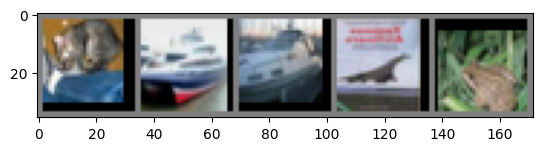

Predicted:  cat ship ship plane deer


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize, 0~1범위의 이미지를 -1~1의 범위로 사용했기 때문에 -0.5 -> *2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 차원 변경 torch (채널, 높이, 너비) -> plt (높이, 너비, 채널)
    plt.show()

def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader)
    images, labels = next(dataiter) # 첫번째 배치의 이미지만 가져오기

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 레이블 정의
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

visualize_predictions(model, test_loader, num_images=5)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR-10 데이터 로드
# 32*32 60000개 컬러 이미지
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 간단한 CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # in_channels, out_channels, kernel_size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 32 -> 28 -> 14
        x = self.pool(F.relu(self.conv2(x)))  # 14 -> 10 -> 5
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 학습하기
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / i}")

print("학습 완료")

# 테스트하기
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.307321356867024
Epoch 2, Loss: 2.298591299381906
Epoch 3, Loss: 2.227631931553384
Epoch 4, Loss: 2.0723523673170314
Epoch 5, Loss: 1.9758460872875665
Epoch 6, Loss: 1.8786826351123727
Epoch 7, Loss: 1.7901904969989417
Epoch 8, Loss: 1.7413312306623898
Epoch 9, Loss: 1.7070148437916635
Epoch 10, Loss: 1.6721936676927462
학습 완료
Accuracy: 38.75%


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize, 0~1범위의 이미지를 -1~1의 범위로 사용했기 때문에 -0.5 -> *2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # (채널, 높이, 너비) -> (높이, 너비, 채널)
    plt.show()

In [18]:
def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 레이블 정의
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

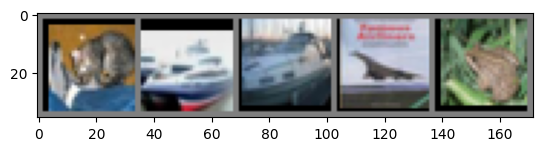

Predicted:  cat ship ship plane frog


In [23]:
visualize_predictions(model, test_loader, num_images=5)